In [1]:
!pip install neuralprophet[live]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 2.1 MB/s 
     |████████████████████████████████| 179 kB 9.0 MB/s 
     |████████████████████████████████| 793 kB 42.6 MB/s 
     |████████████████████████████████| 793 kB 37.0 MB/s 
     |████████████████████████████████| 793 kB 41.2 MB/s 
     |████████████████████████████████| 792 kB 42.8 MB/s 
     |████████████████████████████████| 792 kB 42.0 MB/s 
     |████████████████████████████████| 791 kB 43.2 MB/s 
     |████████████████████████████████| 790 kB 27.6 MB/s 
     |████████████████████████████████| 788 kB 39.5 MB/s 
     |████████████████████████████████| 787 kB 39.3 MB/s 
     |████████████████████████████████| 786 kB 31.9 MB/s 
     |████████████████████████████████| 786 kB 47.0 MB/s 
     |████████████████████████████████| 785 kB 38.8 MB/s 
     |████████████████████████████████| 785 kB 43.4 MB/s 
     |████████████████████████████

In [64]:
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt

In [65]:
from neuralprophet import set_random_seed
set_random_seed(42)

In [66]:
df = pd.read_csv('multiTimeline.csv')

In [72]:
df

,Week,double glazing: (United Kingdom)
0,2020-01-05,46
1,2020-01-12,58
2,2020-01-19,60
3,2020-01-26,57
4,2020-02-02,53
...,...,...
126,2022-06-05,50
127,2022-06-12,57
128,2022-06-19,59
129,2022-06-26,59


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Week                              131 non-null    datetime64[ns]
 1   double glazing: (United Kingdom)  131 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 KB


In [69]:
df['Week'] = pd.to_datetime(df['Week'], format='%Y%m%d')

In [71]:
data = df.rename(columns={'Week': 'ds', 'double glazing: (United Kingdom)': 'y'})[['ds', 'y']]

In [73]:
model = NeuralProphet()

In [74]:
metrics = model.fit(data, freq="W")

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.237% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 458


  0%|          | 0/109 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.62E-01, min: 6.81E-02


  0%|          | 0/109 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.83E-01, min: 4.64E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.78E-01
Epoch[458/458]: 100%|██████████| 458/458 [00:15<00:00, 30.26it/s, SmoothL1Loss=0.00775, MAE=5.18, RMSE=6.48, RegLoss=0]


In [75]:
future = model.make_future_dataframe(data, periods=12, n_historic_predictions=True)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.237% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


In [76]:
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.301% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.301% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


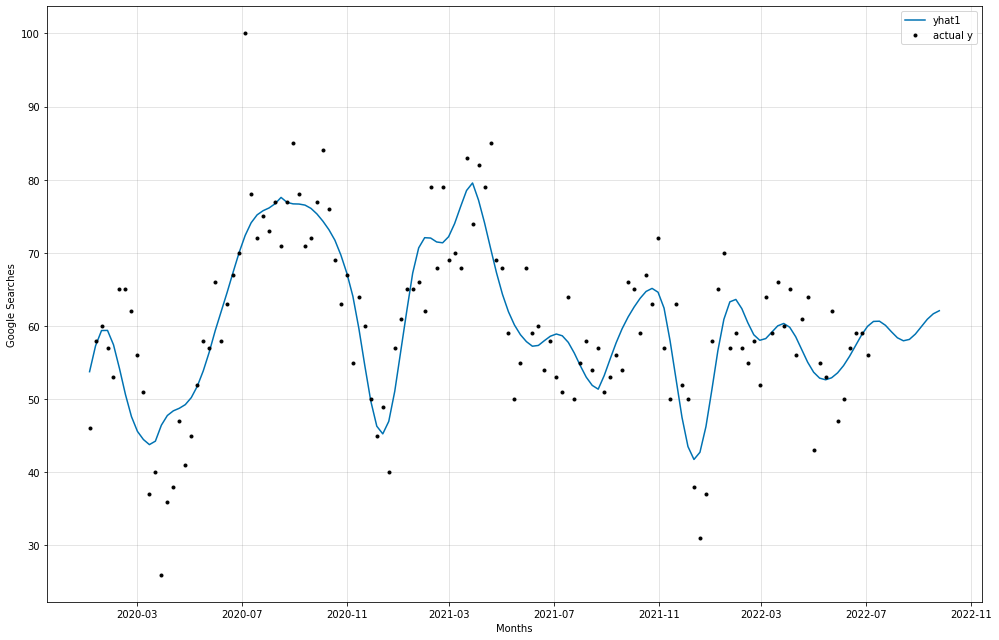

In [77]:
ax = model.plot(forecast, ylabel='Google Searches', xlabel='Months', figsize=(14,9))

In [78]:
forecast

,ds,y,yhat1,residual1,trend,season_yearly
0,2020-01-05,46,53.760380,7.76038,59.563496,-5.803113
1,2020-01-12,58,57.294678,-0.705322,57.825859,-0.531183
2,2020-01-19,60,59.385014,-0.614986,56.088226,3.296788
3,2020-01-26,57,59.402657,2.402657,54.350594,5.052063
4,2020-02-02,53,57.439301,4.439301,52.612961,4.826341
...,...,...,...,...,...,...
138,2022-08-28,None,58.903320,None,55.493336,3.409985
139,2022-09-04,None,59.928230,None,55.391918,4.536314
140,2022-09-11,None,60.931995,None,55.290497,5.641498
141,2022-09-18,None,61.678677,None,55.189087,6.489593


In [79]:
forecast.to_csv('forecast.csv')

##Brand Prediction

In [89]:
df = pd.read_csv('multiTimeline.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   week      131 non-null    int64
 1   interest  131 non-null    int64
dtypes: int64(2)
memory usage: 2.2 KB


In [92]:
df['week'] = pd.to_datetime(df['week'], format='%Y%m%d')

In [93]:
data = df.rename(columns={'week': 'ds', 'interest': 'y'})[['ds', 'y']]

In [94]:
model = NeuralProphet()

In [95]:
metrics = model.fit(data, freq="W")

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.237% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 458


  0%|          | 0/109 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.62E-01, min: 6.81E-02


  0%|          | 0/109 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.81E-01, min: 8.25E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.37E-01
Epoch[458/458]: 100%|██████████| 458/458 [00:15<00:00, 28.74it/s, SmoothL1Loss=0.0163, MAE=8.25, RMSE=10.2, RegLoss=0]


In [96]:
future = model.make_future_dataframe(data, periods=12, n_historic_predictions=True)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.237% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


In [97]:
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.301% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.301% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


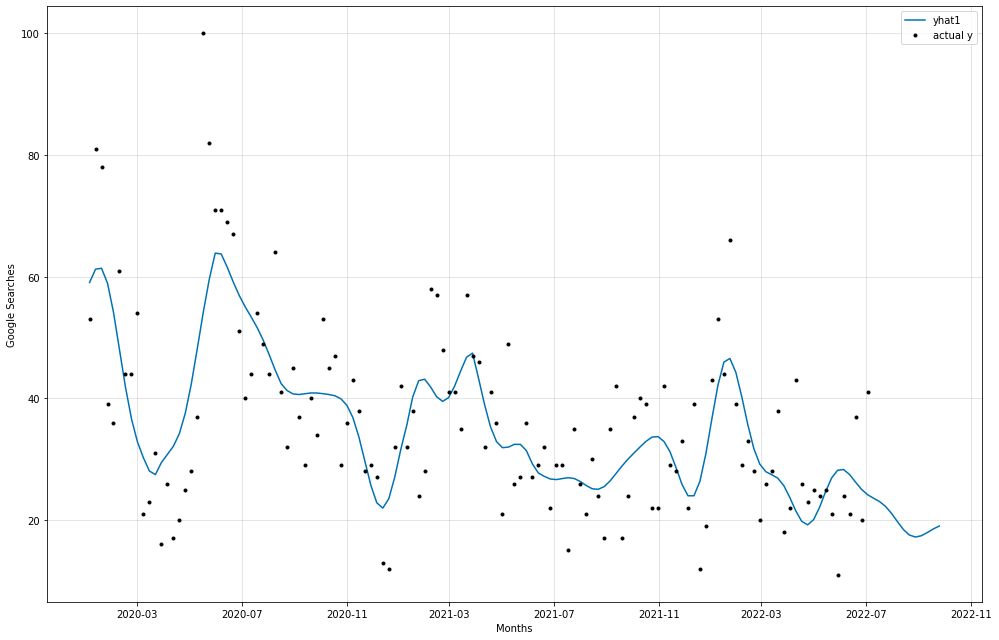

In [98]:
ax = model.plot(forecast, ylabel='Google Searches', xlabel='Months', figsize=(14,9))

In [99]:
forecast.to_csv('forecast.csv')